# Рейтинг роста и падения абсолютных курсов валют

Проект:	**Абсолютный курс**
	
сайт	http://www.abscur.ru

ВКонтакте	https://vk.com/abscur

FaceBook	https://www.facebook.com/abscur

WhatsUp	https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber	https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram	https://t.me/AbsCur

Одноклассники	https://ok.ru/group/53547043520717

Twitter	https://twitter.com/abscurs

GitHub	https://github.com/prog815/abscur

YouTube	https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW

# Статья

Habr

Google.Docs - https://docs.google.com/document/d/1So3MUhi52VyR6BNy1ofJRwmz59FbnNWGLqWl2P8AV-M/edit?usp=sharing 

Сайт

VC

Smart-lab

Kaggle - https://www.kaggle.com/eavprog/abscur-rate-up-down 



# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import lib_abscur_post
from datetime import date
import matplotlib.pyplot as plt

# Таблица последних изменений абсолютных курсов

Последние абсолютные курсы доступны по ссылке https://docs.google.com/spreadsheets/d/1CrNvvV-p6XG7lSJXftPKk_aY4nuH4WK25rPxaNKrM3U/edit#gid=1323839768

In [2]:
data = pd.read_csv('../input/abscur-last/abscur_last.csv',index_col=0)
data

,курс на 2022-02-25,% изм.день,% изм.неделя,% изм.месяц,% изм.квартал,% изм.полгода,% изм.год
AUD,13.594656,0.001831,0.011314,0.010004,0.006402,0.026485,-0.038603
CAD,14.822130,0.005249,0.007109,-0.005376,-0.003176,0.027316,0.045502
HKD,2.431812,0.011036,0.014320,0.006957,0.006829,0.034928,0.063156
JPY,0.164250,0.005333,0.009175,-0.004958,0.003818,-0.012220,-0.018908
SEK,1.999832,-0.000059,-0.002122,-0.015875,-0.032739,-0.049337,-0.067881
USD,18.989928,0.011492,0.015566,0.010043,0.008343,0.037754,0.070727
CHF,20.505771,0.002183,0.008833,0.001149,0.018558,0.028752,0.048574
EUR,21.237333,0.000719,-0.000420,-0.000460,0.006426,-0.012489,-0.015897
CNY,3.001116,0.008623,0.016444,0.009237,0.017093,0.062388,0.091693
CZK,0.861308,-0.002589,-0.015177,-0.008079,0.039798,0.021526,0.037565


In [3]:
text = ''

# Функция отчета

In [4]:
def get_rep(d):
    d = d.copy()*100
    d.sort_values(ascending=True,inplace=True)
    _=d.plot.bar(figsize=(15,5),grid=True,title='Изменение (' + d.name + ')',ylabel='%')
    plt.savefig(d.name + '.png',transparent=False,facecolor='white')
    text = ''
    text += 'самые упавшие: ' + ', '.join([cur + ' ' + str(np.round(izm,1)) + '%' for cur,izm in d.iloc[:3].reset_index().values]) + ';\n'
#     text += 'самые стабильные: ' + ', '.join([cur + ' ' + str(np.round(izm,2)) + '%' for cur,izm in d[abs(d).sort_values().index[:3].values].reset_index().values]) + ';\n'
    text += 'самые подросшие: ' + ', '.join([cur + ' ' + str(np.round(izm,1)) + '%' for cur,izm in d.iloc[-3:].reset_index().values]) + '.\n'
    return text

# Рейтинг за неделю

Рейтинг за неделю:
самые упавшие: RUB -9.0%, KZT -7.1%, UAH -3.9%;
самые подросшие: CNY 1.6%, COP 2.0%, BRL 2.5%.



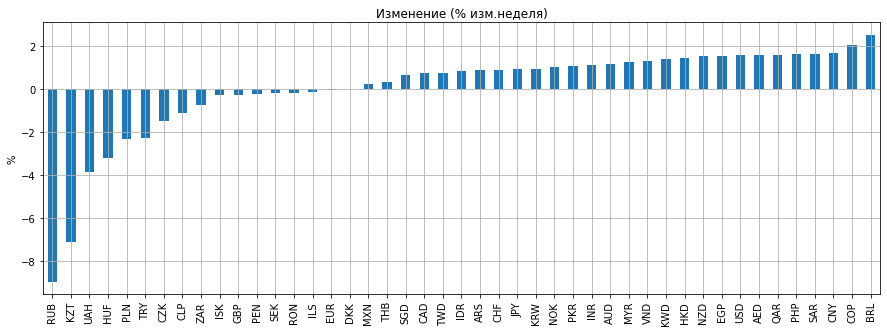

In [5]:
res = 'Рейтинг за неделю:\n' + get_rep(data.iloc[:,2])
print(res)
text += res

# Рейтинг за месяц

Рейтинг за месяц:
самые упавшие: RUB -6.4%, KZT -6.1%, UAH -3.1%;
самые подросшие: THB 2.6%, ISK 2.8%, BRL 7.3%.



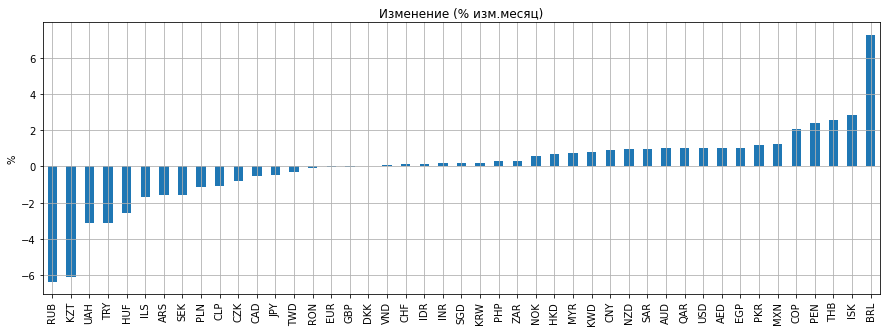

In [6]:
res = 'Рейтинг за месяц:\n' + get_rep(data.iloc[:,3])
print(res)
text += res

# Рейтинг за квартал

Рейтинг за квартал:
самые упавшие: TRY -14.0%, RUB -11.5%, UAH -9.0%;
самые подросшие: ZAR 5.9%, MXN 6.0%, BRL 9.6%.



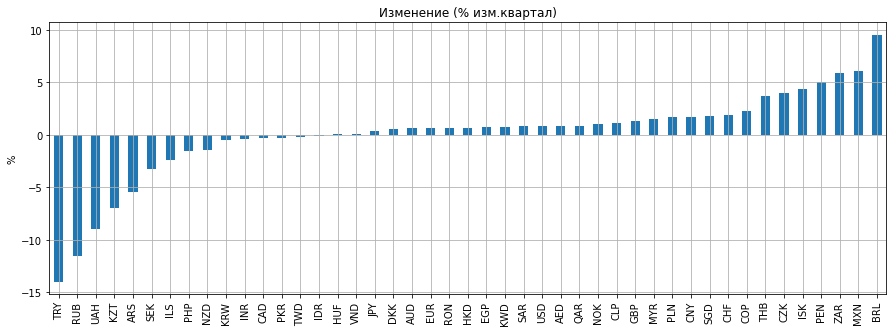

In [7]:
res = 'Рейтинг за квартал:\n' + get_rep(data.iloc[:,4])
print(res)
text += res

# Рейтинг за полгода

Рейтинг за полгода:
самые упавшие: TRY -38.1%, RUB -9.3%, UAH -7.0%;
самые подросшие: CNY 6.2%, BRL 6.4%, PEN 11.3%.



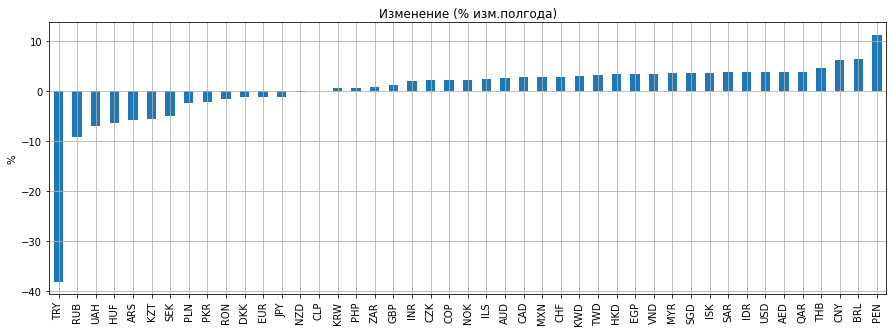

In [8]:
res = 'Рейтинг за полгода:\n' + get_rep(data.iloc[:,5])
print(res)
text += res

# Рейтинг за год

Рейтинг за год:
самые упавшие: TRY -45.4%, ARS -10.6%, CLP -8.1%;
самые подросшие: VND 7.9%, CNY 9.2%, BRL 12.9%.



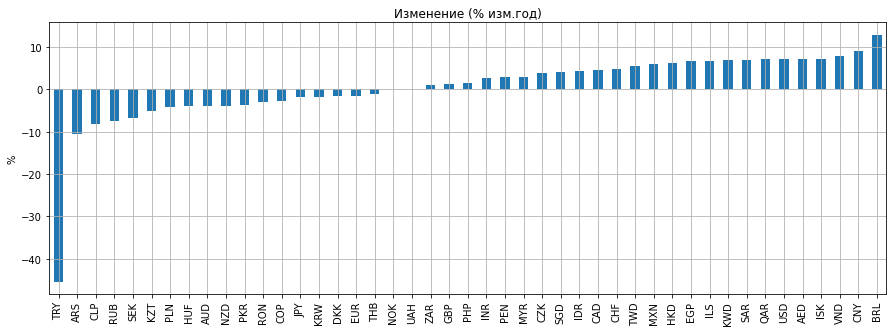

In [9]:
res = 'Рейтинг за год:\n' + get_rep(data.iloc[:,6])
print(res)
text += res

# Публикация по каналам проекта

In [10]:
title = 'Рейтинг роста и падения абсолютных курсов на ' + str(data.columns[0])[-10:]
message = text
link = 'https://www.kaggle.com/eavprog/abscur-rate-up-down'
print(title + '\n\n' + message + '\n\n' + link)

Рейтинг роста и падения абсолютных курсов на 2022-02-25

Рейтинг за неделю:
самые упавшие: RUB -9.0%, KZT -7.1%, UAH -3.9%;
самые подросшие: CNY 1.6%, COP 2.0%, BRL 2.5%.
Рейтинг за месяц:
самые упавшие: RUB -6.4%, KZT -6.1%, UAH -3.1%;
самые подросшие: THB 2.6%, ISK 2.8%, BRL 7.3%.
Рейтинг за квартал:
самые упавшие: TRY -14.0%, RUB -11.5%, UAH -9.0%;
самые подросшие: ZAR 5.9%, MXN 6.0%, BRL 9.6%.
Рейтинг за полгода:
самые упавшие: TRY -38.1%, RUB -9.3%, UAH -7.0%;
самые подросшие: CNY 6.2%, BRL 6.4%, PEN 11.3%.
Рейтинг за год:
самые упавшие: TRY -45.4%, ARS -10.6%, CLP -8.1%;
самые подросшие: VND 7.9%, CNY 9.2%, BRL 12.9%.


https://www.kaggle.com/eavprog/abscur-rate-up-down


In [11]:
if(date.today().toordinal() % 3 == 0):
    lib_abscur_post.postToChanels(title, message, link)